# Convolution

## Installation of pytorch to be able to use it

## Open Image

In [4]:
from __future__ import print_function
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys

In [5]:
"""
Open image
@param path, path to open image
@return imageTensor, pytorch tensor matrix
"""
def openImage(path):
    #use cv2 to open image
    image = cv2.imread(path, 0) # 0 is grayscale
    #convert to pytorch tensor
    imageTensor = torch.FloatTensor(image)
    return imageTensor


## Image contamination with Gaussian and S&P noise

**What is Image Noise?**
---
> **Image noise** is random variation of brightness or color information in images, and is usually an aspect of electronic noise.   

* It can be produced by the image sensor and circuitry of a scanner or digital camera. 
* Image noise can also originate in film grain and in the unavoidable shot noise of an ideal photon detector. 
* Image noise is an undesirable by-product of image capture that obscures the desired information.
* The original meaning of "noise" was "unwanted signal"; unwanted electrical fluctuations in signals received by AM radios caused audible acoustic noise ("static"). By analogy, unwanted electrical fluctuations are also called "noise".
* Image noise can range from almost imperceptible specks on a digital photograph taken in good light, to optical and radioastronomical images that are almost entirely noise, from which a small amount of information can be derived by sophisticated processing. Such a noise level would be unacceptable in a photograph since it would be impossible even to determine the subject.
* Noise can reduce the accuracy of neural network.
* Noise can lead to less generalization power when testing on real-world data.



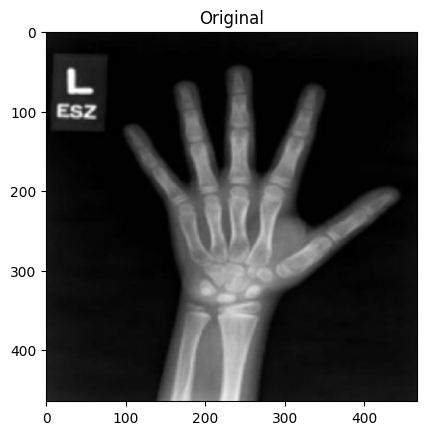

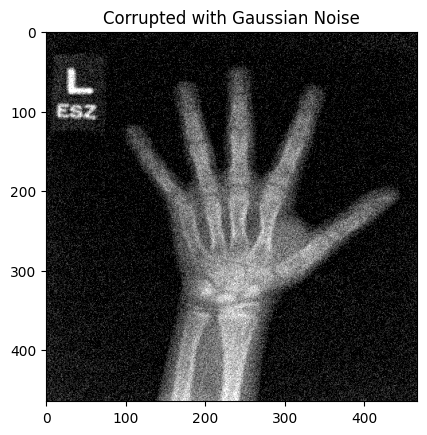

In [6]:
from skimage.util import random_noise

def contaminate_gaussian_noise(U, std_noise = 20):
    mu = 0
    size_U = U.shape
    #sample gaussian noise with mu = 0
    Noise_gauss = torch.normal(mu, std_noise, size = size_U)
    #add gaussian noise
    U_contaminated = U + Noise_gauss
    return U_contaminated
    
def contaminate_salt_and_pepper_noise(U, perc_corruption = 0.3):
    mu = 0
    size_U = U.shape
    print(" size_U ", size_U)
    U_corrupted = torch.clone(U).detach()
    #choose what pixels to corrupt
    corrupted_pixels = torch.bernoulli(torch.ones(size_U) * perc_corruption).long()
    #choose what pixel values to use
    corrupted_values = torch.bernoulli(torch.ones(size_U) * 0.5).float() * 255
    #corrupt the copy of the image
    
    return U_corrupted
    
def test_gaussian_contamination():
  # image path
  inputPath = "x_ray1.jpg"    
  # read image
  U = openImage(inputPath)
  #contaminate image with gaussian noise 
  U_gaussian_noise = contaminate_gaussian_noise(U, std_noise = 30)
  #reconstruct the original image with an ideal filter
  
  
  # show original image
  plt.rcParams["axes.grid"] = False
  plt.figure(1)
  plt.imshow(U, cmap = plt.get_cmap('gray'),vmin = 0,vmax = 255)
  plt.title('Original')

  # show corrupted image with gaussian noise
  plt.rcParams["axes.grid"] = False
  plt.figure(2)
  plt.imshow(U_gaussian_noise, cmap = plt.get_cmap('gray'),vmin = 0,vmax = 255)
  plt.title('Corrupted with Gaussian Noise')

test_gaussian_contamination()

## Baseline salt and pepper noise

size U  torch.Size([465, 467])


Text(0.5, 1.0, 'Corrupted with Pepper')

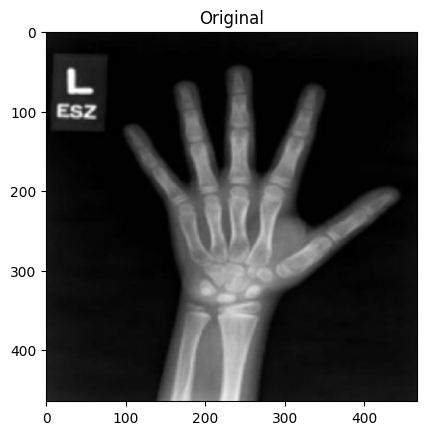

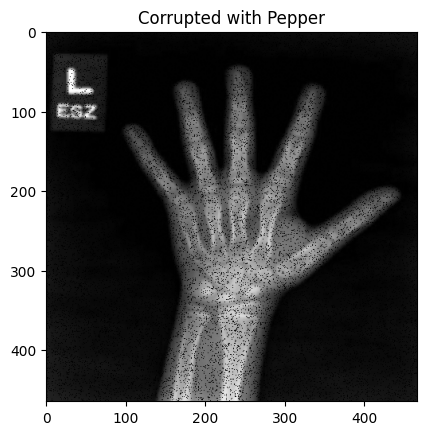

In [7]:
inputPath = "x_ray1.jpg"    
# read image
U = openImage(inputPath)
size_U = U.shape
print("size U ", size_U)
prob_index = torch.ones(size_U) * 0.9

corrupted_pixels = torch.bernoulli(prob_index).long()
U_corrupted = U * corrupted_pixels



# show original image
plt.rcParams["axes.grid"] = False
plt.figure(1)
plt.imshow(U, cmap = plt.get_cmap('gray'),vmin = 0,vmax = 255)
plt.title('Original')


# show corrupted image
plt.rcParams["axes.grid"] = False
plt.figure(2)
plt.imshow(U_corrupted, cmap = plt.get_cmap('gray'),vmin = 0,vmax = 255)
plt.title('Corrupted with Pepper')



